<a href="https://colab.research.google.com/github/mariaclaraseixa/palmerpenguins/blob/main/Palmer_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [63]:
pip install palmerpenguins

In [64]:
import pandas as pd

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import palmerpenguins
from palmerpenguins import load_penguins

In [67]:

if 'load_penguins' in globals():
    penguins = load_penguins()
else:
    print("Error: load_penguins function not found. Please run the import cell (cell g3B0dHqfWx17) first.")

In [68]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [69]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [70]:
penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [71]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


In [72]:
categorical_col = penguins.select_dtypes(include=['object']).columns
numerical_col = penguins.select_dtypes(include=['float64']).columns

In [73]:
print(penguins.species.unique())
print(penguins.island.unique())
print(penguins.sex.unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]


In [74]:
k = 0
for i in penguins['sex']:
    if i == '.':
        k += 1

print(k)

filtered_data = penguins[penguins['sex'] != '.']

0


In [75]:
def PlotHistogram(penguins, variable):
    plt.figure()
    plt.hist(penguins[variable], bins=100)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Species" .format(variable))
    plt.show()

def PlotBar(penguins, variable, n=5):
    data_ = penguins[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]

    plt.figure()
    plt.bar(data_counts.index, data_counts)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("island" .format(variable))
    plt.show()

def BoxPlotMethod(data, variable):
    plt.figure()
    sns.boxplot(x = variable, data=data)
    plt.show()

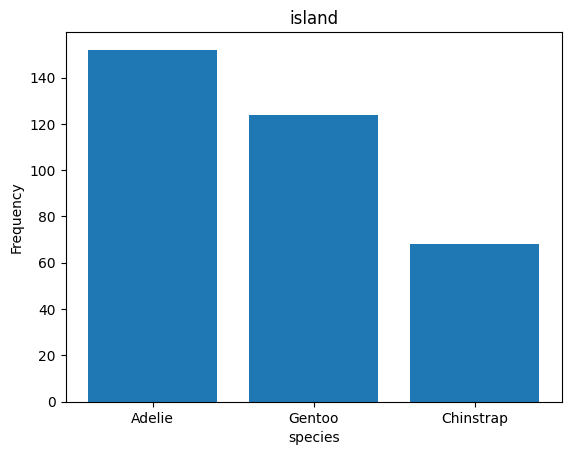

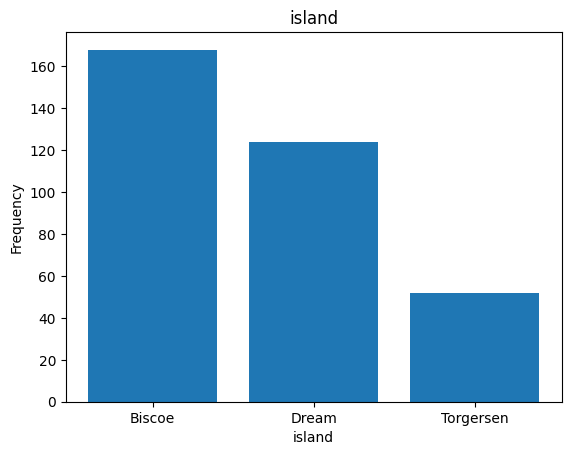

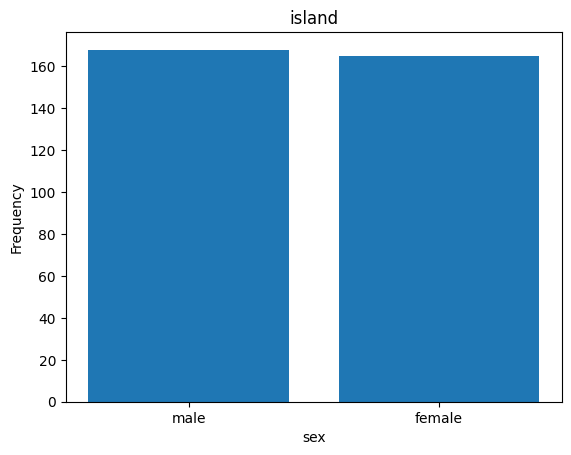

In [76]:
for i in categorical_col:
    PlotBar(filtered_data, i)

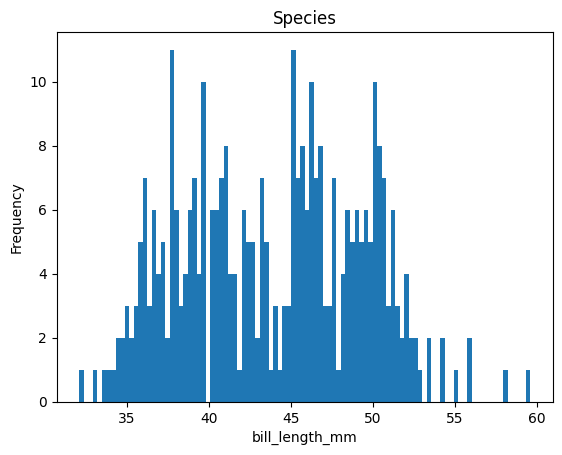

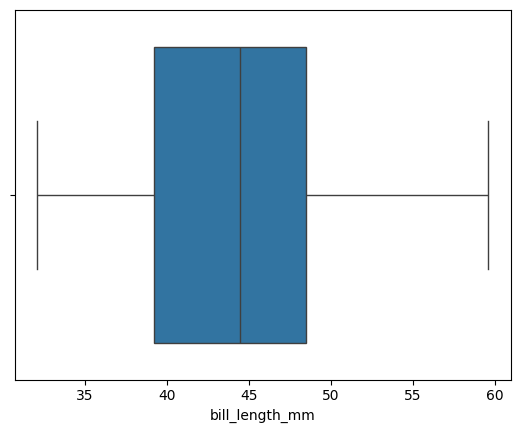

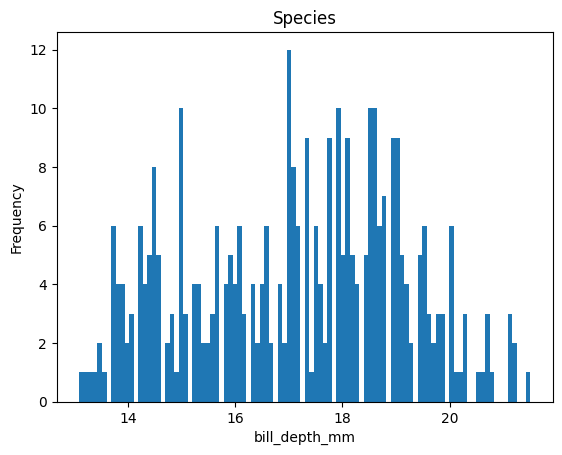

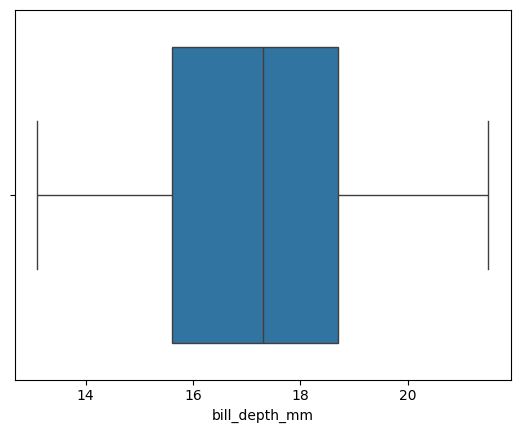

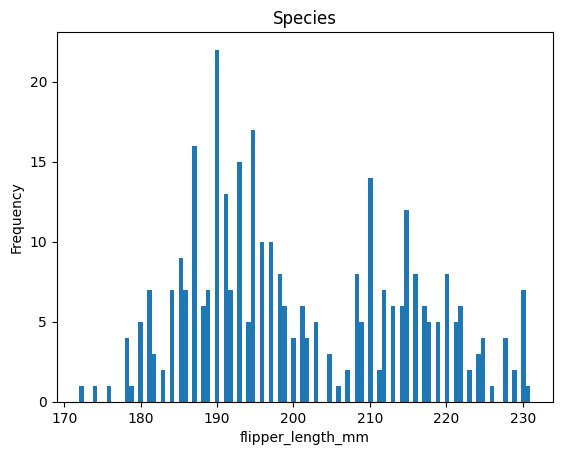

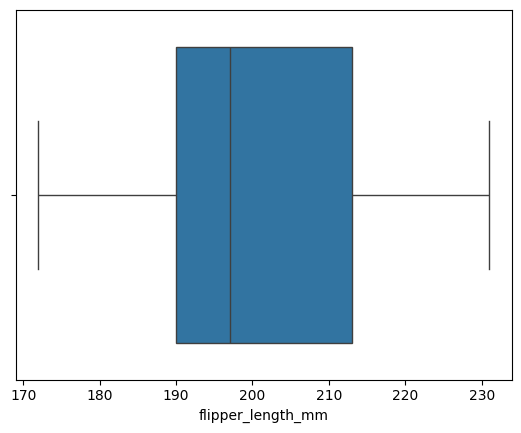

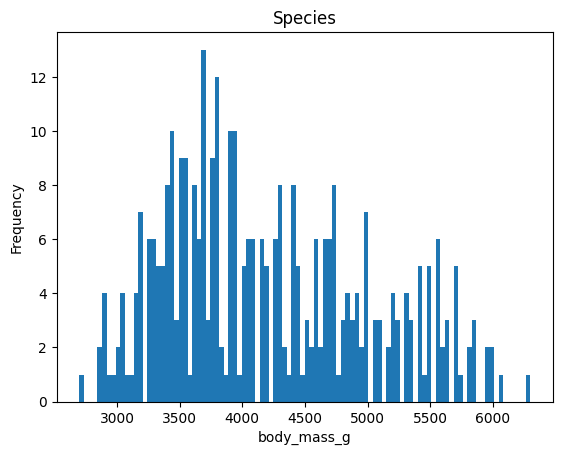

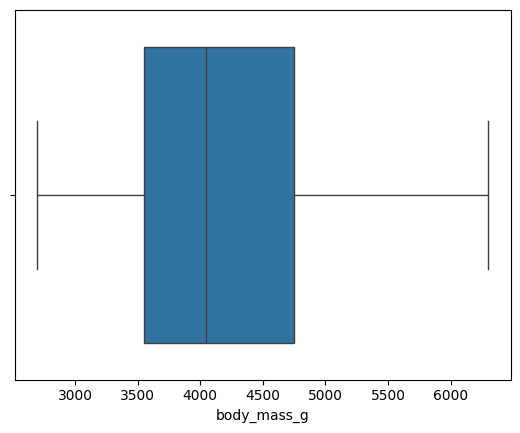

In [77]:
for i in numerical_col:
    PlotHistogram(filtered_data, i)
    BoxPlotMethod(filtered_data, i)

In [78]:
filtered_data.iloc[:,2:6].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


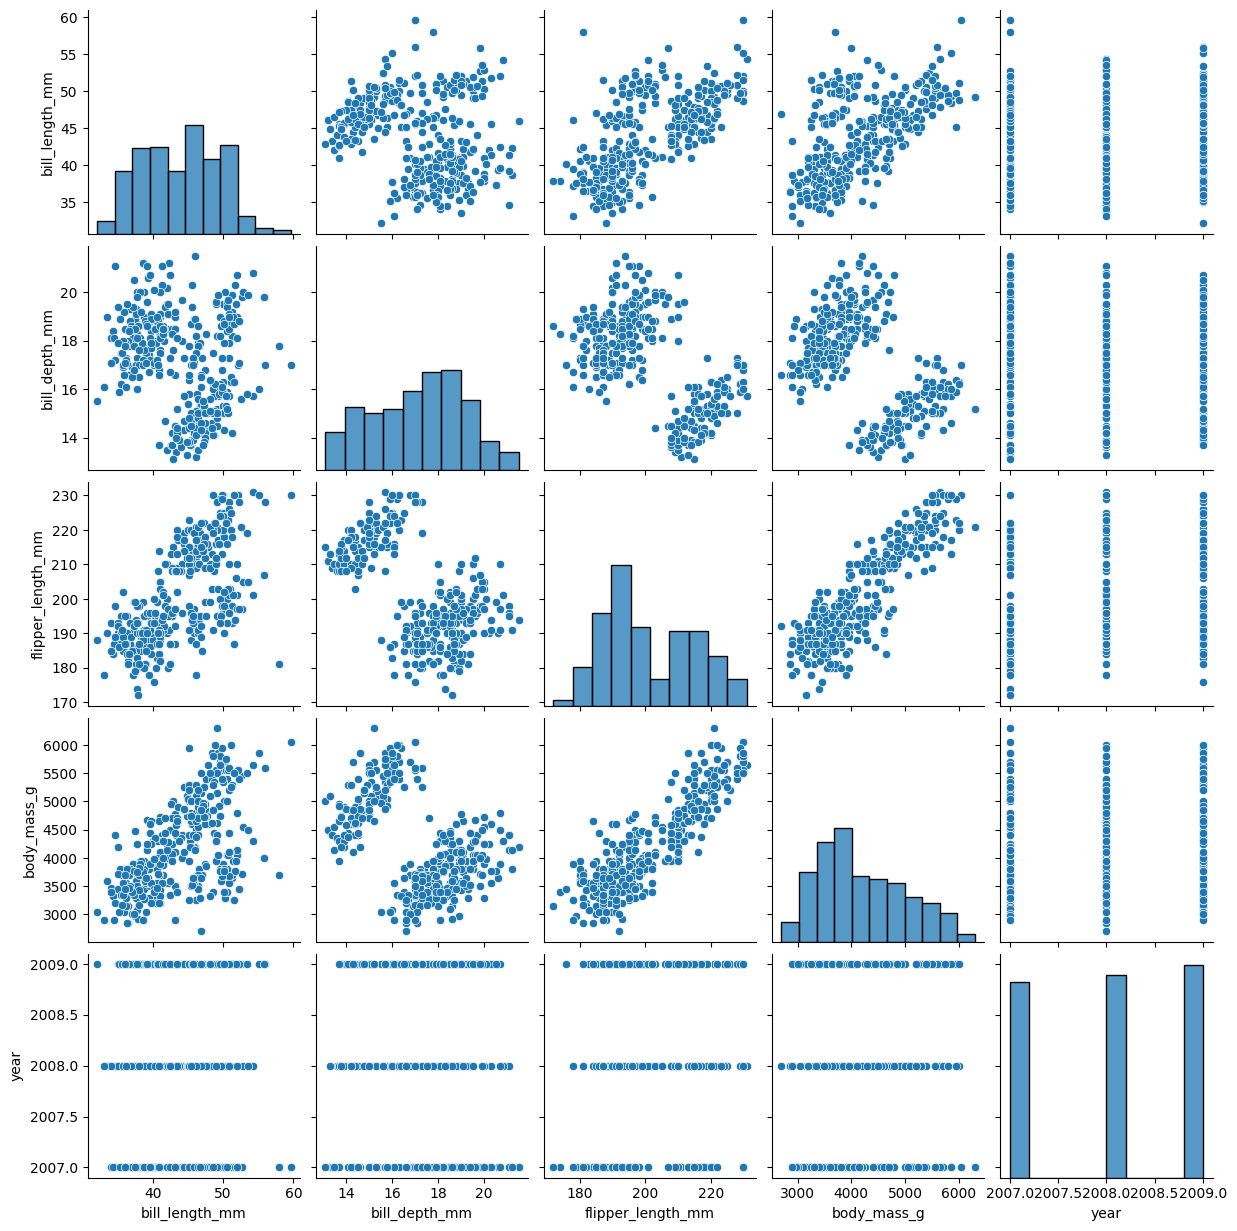

In [79]:
sns.pairplot(data=filtered_data)

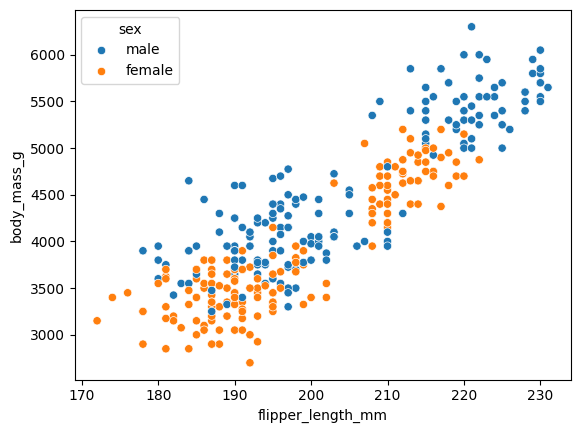

In [80]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=filtered_data);

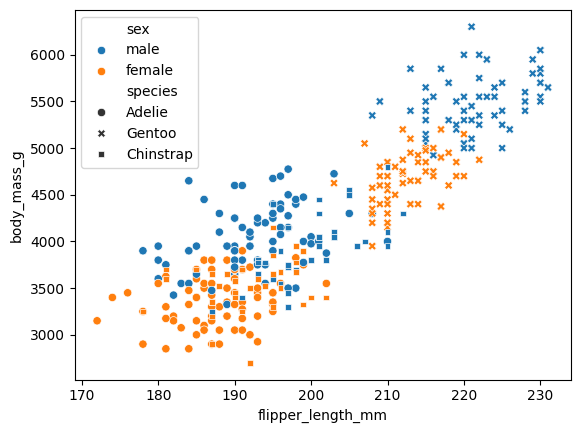

In [81]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', style='species', data=filtered_data);

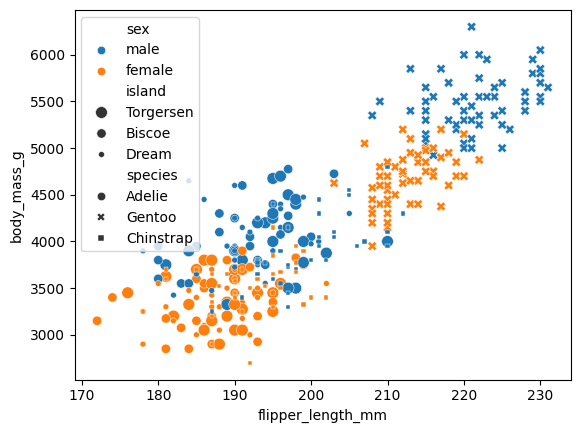

In [82]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', style='species', size='island', data=filtered_data);

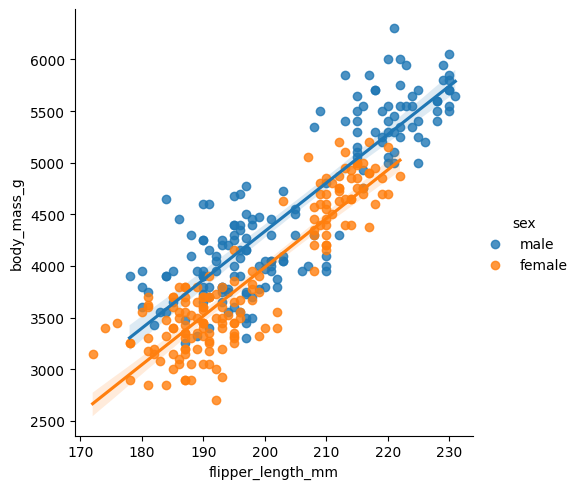

In [83]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=filtered_data)

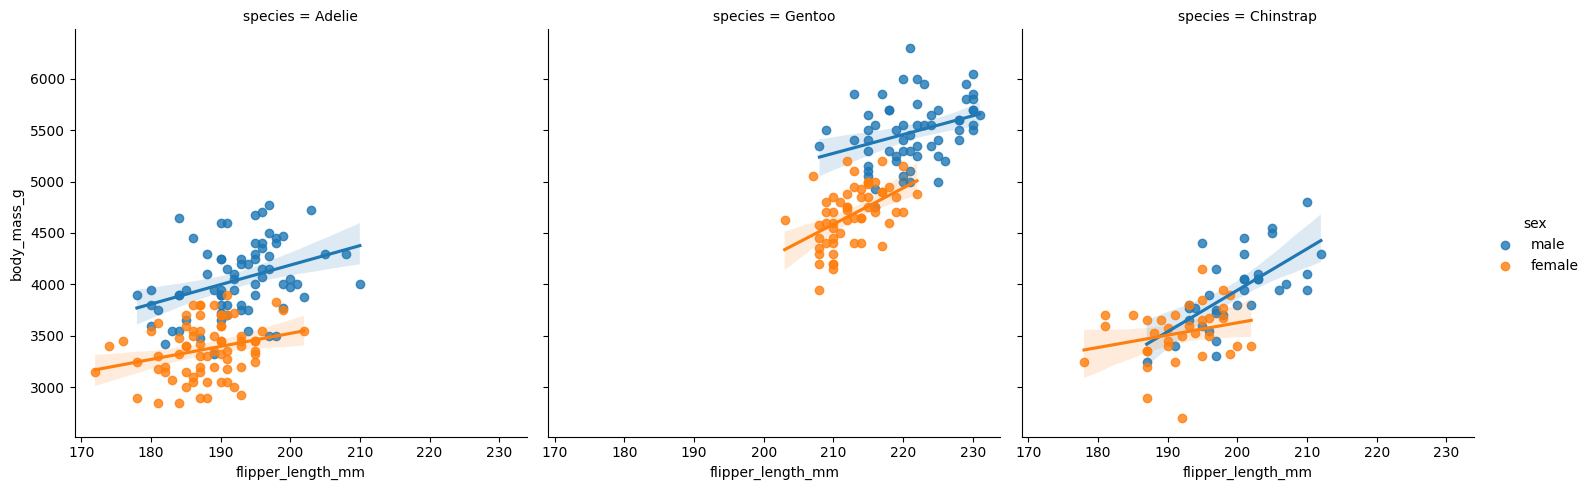

In [84]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='sex', col='species', data=filtered_data)

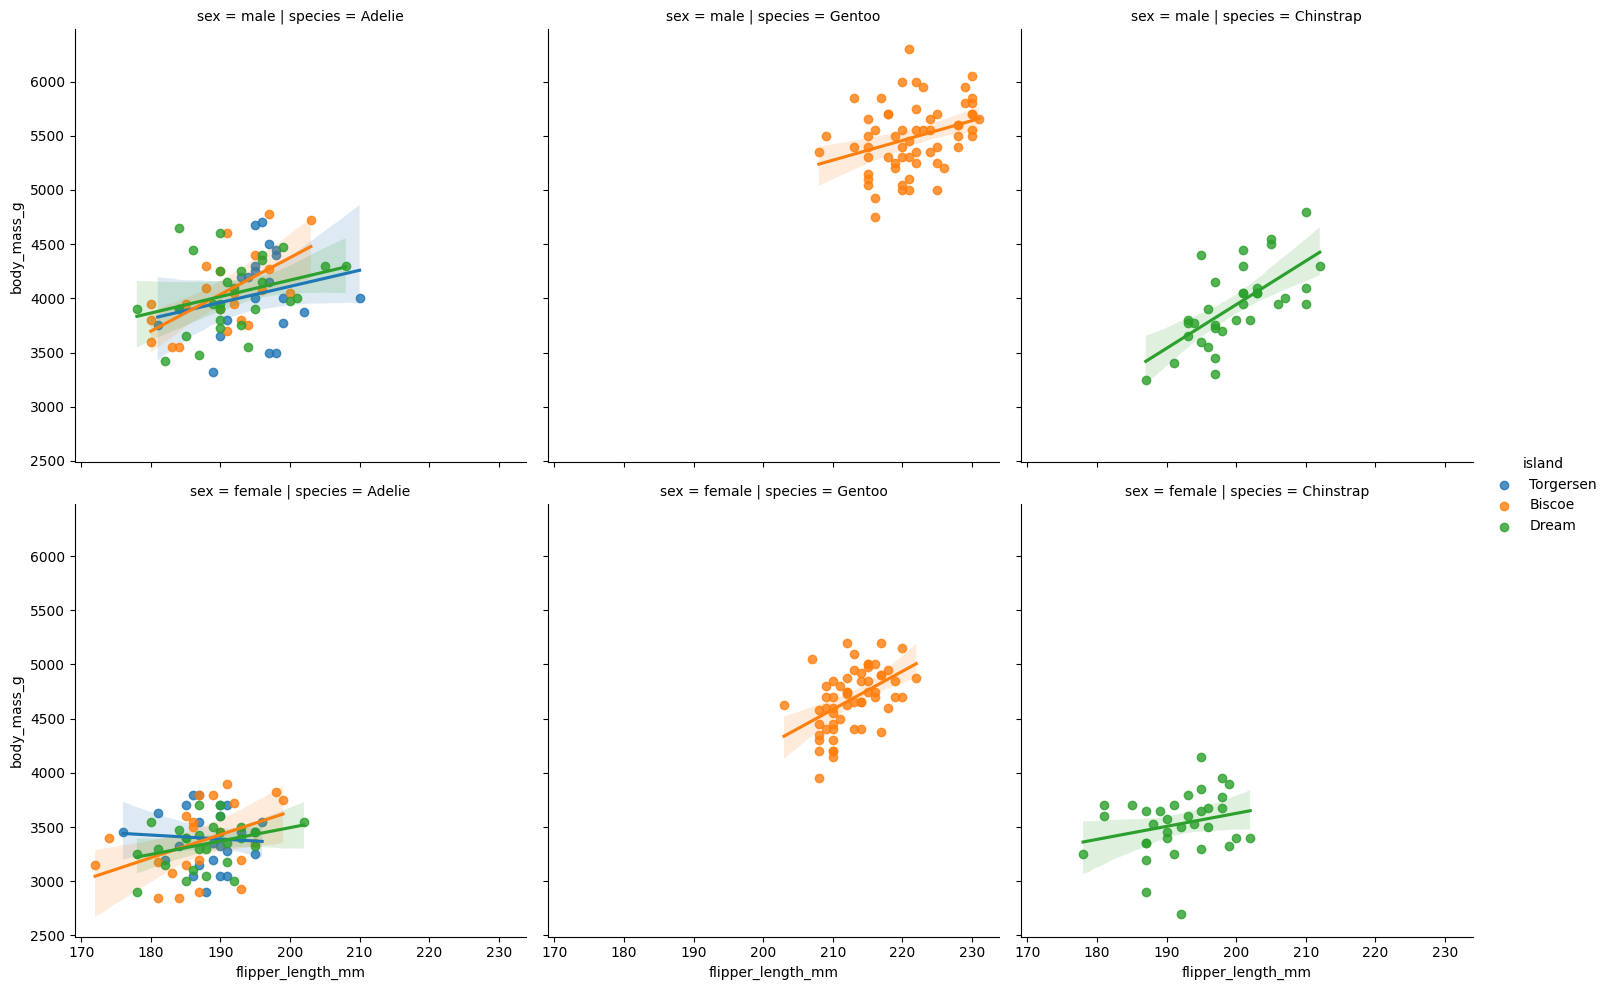

In [85]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='island', col='species', row='sex', data=filtered_data)

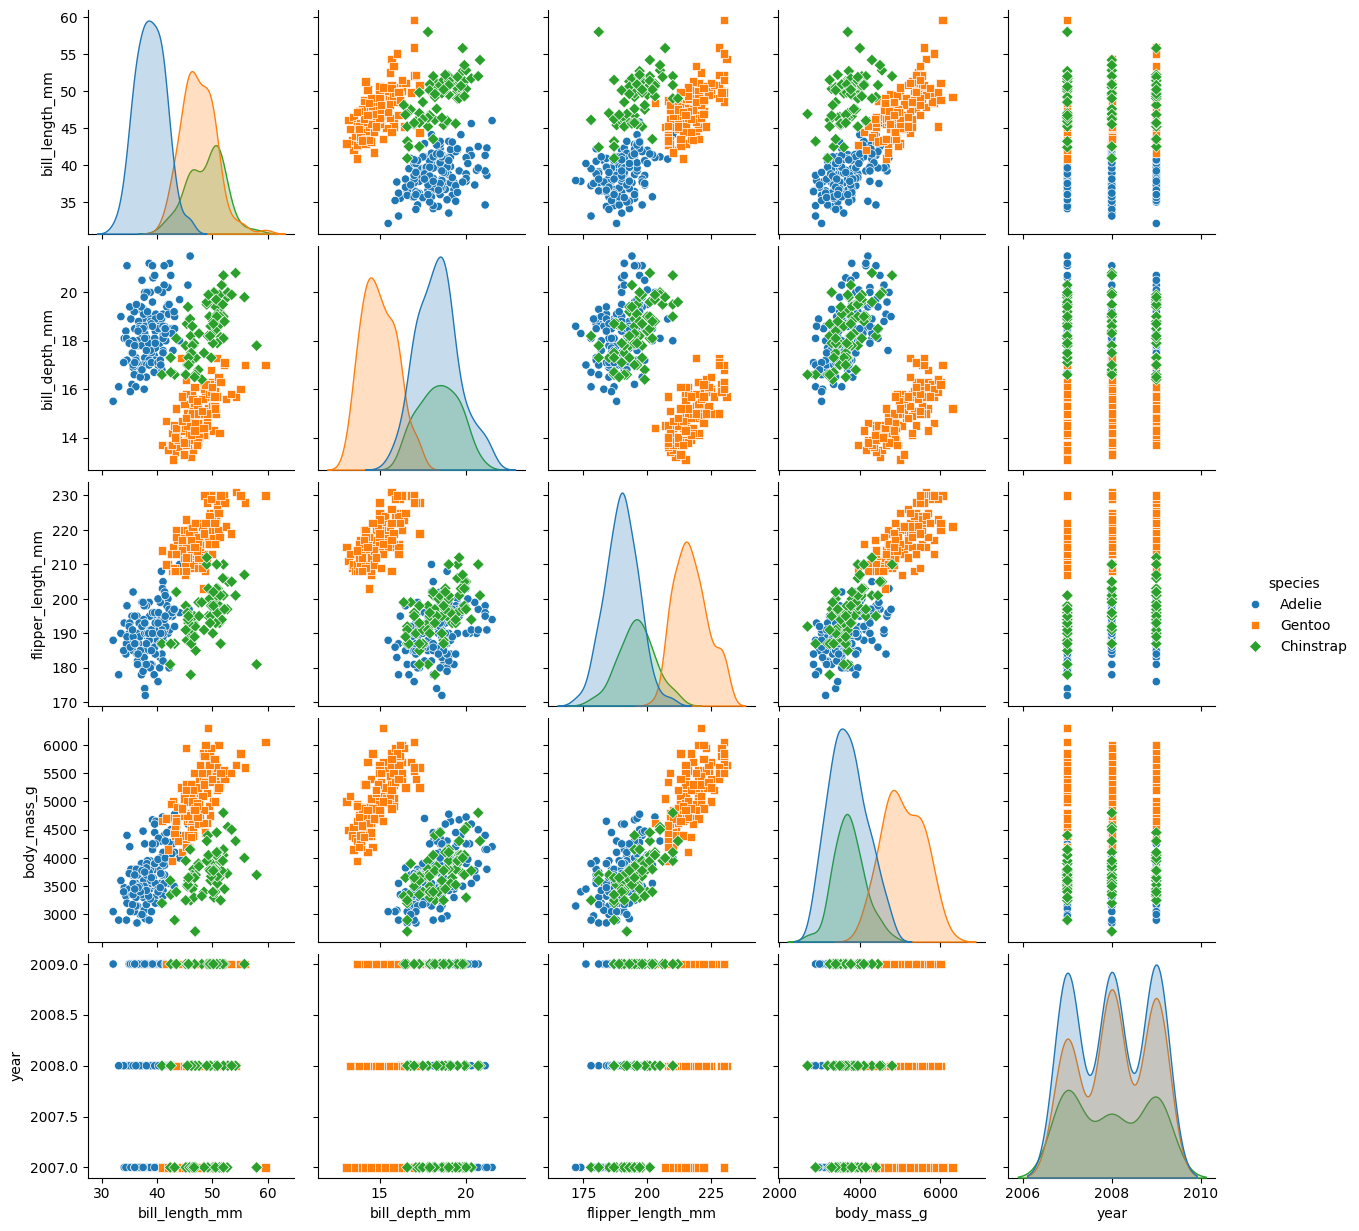

In [86]:
sns.pairplot(penguins, hue='species', markers=["o", "s", "D"])
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

x = filtered_data.drop('species', axis=1)
y = filtered_data['species']

categorical_features = ['island', 'sex', 'year']
numerical_features = x.select_dtypes(include=np.number).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

x_processed = preprocessor.fit_transform(x)

cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

df_processed = pd.DataFrame(x_processed, columns=all_feature_names)
df_preprocessed = pd.concat([df_processed, y.reset_index(drop=True)], axis=1) # Concatenate with the target variable

display(df_preprocessed.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,sex_nan,year_2007,year_2008,year_2009,species
0,-0.884499,0.785449,-1.418347,-0.564142,-1.259316,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Adelie
1,-0.811126,0.126188,-1.062250,-0.501703,-1.259316,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Adelie
2,-0.664380,0.430462,-0.421277,-1.188532,-1.259316,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Adelie
3,NaN,NaN,NaN,NaN,-1.259316,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Adelie
4,-1.324737,1.089724,-0.563715,-0.938776,-1.259316,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Adelie


In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier here as it's used in the pipeline
import pandas as pd
import numpy as np

# Handle missing values and create filtered_data_imputed
imputer = SimpleImputer(strategy='most_frequent')
# Apply imputer to the original filtered_data
filtered_data_imputed_array = imputer.fit_transform(filtered_data)
filtered_data_imputed = pd.DataFrame(filtered_data_imputed_array, columns=filtered_data.columns)

# Separate features and target from the imputed data
x = filtered_data_imputed.drop(['species'], axis=1)
y = filtered_data_imputed['species']

# Identify categorical and numerical columns for the imputed data structure
categorical_features = ['island', 'sex', 'year']
numerical_features = x.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features) # Added scaling here
    ])

# Create a pipeline with preprocessing and KNN classifier
# Note: Imputation is already done before the pipeline, so it's not included here
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

# Renaming the pipeline variable to knn_pipeline for consistency with cell S2PQdgg2s8X3
knn_pipeline = pipeline

# Note: The train_test_split and training of the pipeline will be done in the next cell (4GvaAWdWrFR9 or similar)
# to avoid repeating the split and training if this cell is re-run.
# However, for the pipeline to be defined for cell S2PQdgg2s8X3, it needs to be defined here.
# The actual fitting will happen in the next cell.

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    filtered_data_imputed.drop('species', axis=1),
    filtered_data_imputed['species'],
    test_size=0.50,
    random_state=42
)

knn = KNeighborsClassifier(n_neighbors=1)


knn_pipeline.fit(X_train, y_train)



preds_knn = knn_pipeline.predict(X_test)


print(confusion_matrix(y_test, preds_knn))

[[39 19 21]
 [ 7 23  0]
 [ 0  0 63]]


              precision    recall  f1-score   support

      Adelie       0.85      0.49      0.62        79
   Chinstrap       0.55      0.77      0.64        30
      Gentoo       0.75      1.00      0.86        63

    accuracy                           0.73       172
   macro avg       0.72      0.75      0.71       172
weighted avg       0.76      0.73      0.71       172



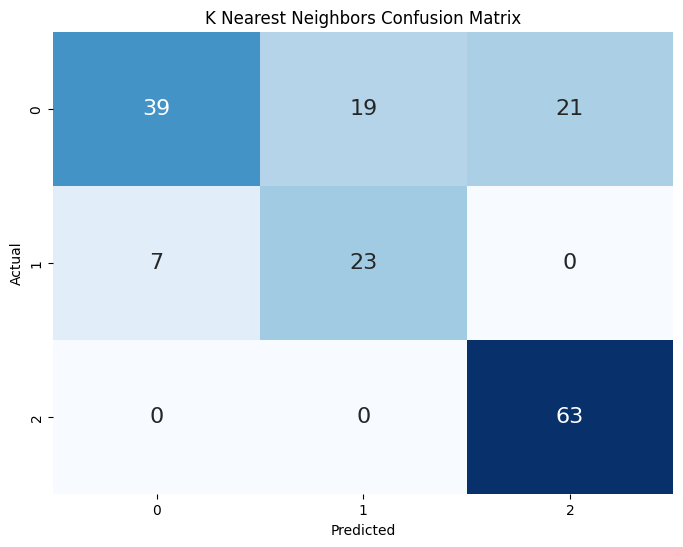

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Imprime o relatório de classificação
print(classification_report(y_test, preds_knn))

# Cria a matriz de confusão
cm = confusion_matrix(y_test, preds_knn)

# Plot do heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})

plt.title("K Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


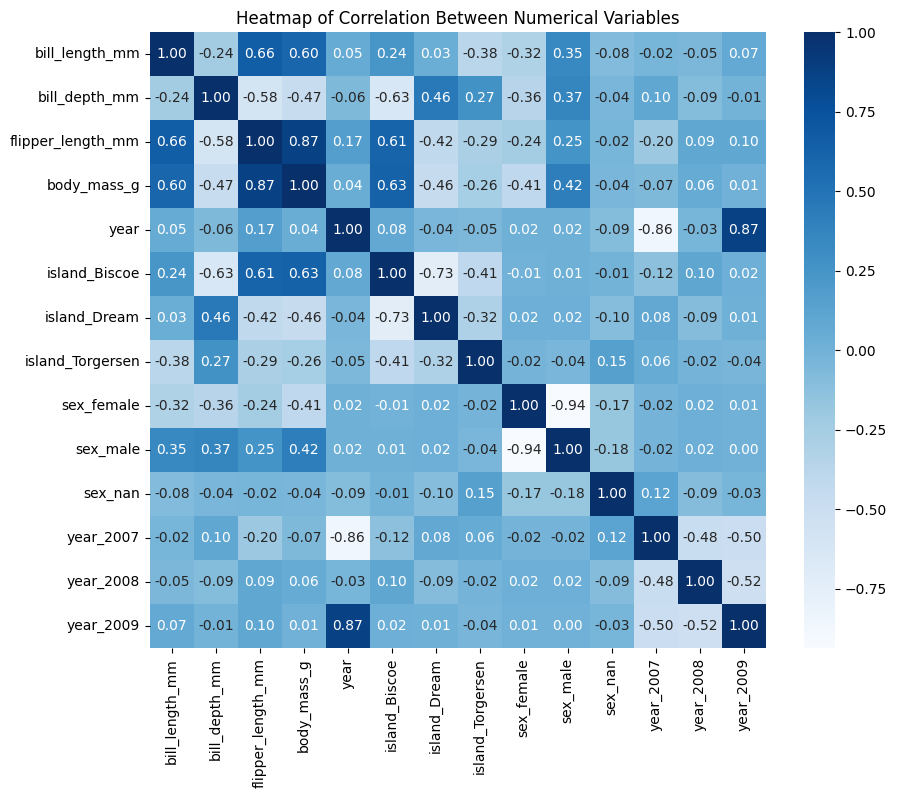

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df_preprocessed = df_preprocessed.drop('species', axis=1)

corr_matrix = numerical_df_preprocessed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', square=True, cbar=True)

plt.title('Heatmap of Correlation Between Numerical Variables')
plt.show()
